#Introducción:

A lo largo de la historia los movimientos armónicos de los cuerpos han sido de gran interes para la humanidad, por esto razón los péndulos se han propuesto como uno de los mejores modelos para el estudio de este movimiento. De igual forma, las matemáticas de las ecuaciones de movimiento a este clase de movimientos han requerido la resolución de ecuaciones diferenciales de segundo orden. 

Con esto en mente el objetivo principal de este proyecto final es la solución a sus ecuaciones de movimiento y la animación de las mismas. Existen diferentes sistemas de péndulos, para este caso en particular se trabajará con  péndulo simple, péndulo doble y un sistema de N-péndulos. Con estos tres tipos de sistemas se propone la solución de las ecuaciones de movimiento por métodos númericos seguido de su respectiva animación a cada una de ellas.

#Péndulo Simple:

###Fundamentos Físicos:

El pédulo simple se define como una párticula de masa m suspendida de algún punto por un hilo, o un resorte. El péndulo simple modela los movimiento de  trayectoria oscilatoria no amortiguada o amortiguada en un intervalos de tiempo. 

Es importante tener en cuenta las caracteristicas fundamentales de un péndulo simple, tales como: 

- ***Periodo*** Se define como el tiempo que se demora el péndulo en realizar una oscilación completa. Este periodo es independiente a la amplitud. De igual manera el periodo es directamente proporcional a la raiz cuadrada de su longitud.


- ***Frecuencia*** Se define como el número de oscilaciones que se generan en un segundo.


- ***Amplitud*** Se define como la máxima distancia que existe entre la posición de equilibrio y la máxima altura


- ***Ciclo*** Un ciclo se define cmo la vibración completa del sistema que se da cuando el cuerpo parte de una posición y retorna al mismo punto.

Es posible apreciar visualmente el péndulo simple:

![Péndulo Simple](/home/aleaguilera/MC/MC/ProyectoFinal/Pendulo-tension-abajo.png  "Péndulo SImple")

##Ecuación para péndulo Simple:

A través de la solución de la ecuación diferencial es posible tener una buena aproximación para péndulo simple.

$$ 
m\frac{\partial ^{2}x}{\partial t^{2}} = -kx
$$

$$
m\frac{\partial ^{2}x}{\partial t^{2}} + kx = 0
$$

Su polinomio asociado es:

$$
m r^{2} + k = 0
$$

Siendo:

$$
r^{2} = \frac{-k}{m}
$$

Con Raices:

$$
r = \pm \sqrt{\frac{-k}{m}}
$$

Solución: 

$$
x_{1} = e ^{+\frac{i k}{m}}
$$

$$
x_{2} = e ^{-\frac{i k}{m}}
$$

$$
x_{t} = C_{1} e ^{+\frac{i k}{m}} + C_{2} e ^{-\frac{i k}{m}}
$$

In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import scipy as sp
import sympy as sy
import matplotlib.pyplot as plt
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


##Ecuación para péndulo Simple:
$$
\frac{d^{2}x}{dt^{2}} = -\frac{k}{m} x
$$

In [2]:
#Método para el pédulo simple, partiendo de la solución a la ecuación diferencial
def penduloSimple(apertura,frecuencia,desface,duracion):
    A=apertura
    w=frecuencia
    d=desface
    tmax=duracion
    momentos = 100
    
    instantes = np.linspace(0,tmax,momentos)
    posicion = np.zeros(momentos)
    
    for i in range(momentos):
        posicion[i]=A*np.sin(w*i+d)
    plt.figure(figsize=(10,10))
    plt.plot(instantes,posicion,'--', color='teal')
    plt.title(r"""$Posiciones\,p\'endulo\,simple$""", fontsize=30)
    plt.xlabel(r"""$Tiempo$""", fontsize=20)
    plt.ylabel(r"""$Posici\'on$""", fontsize=20)
    plt.show

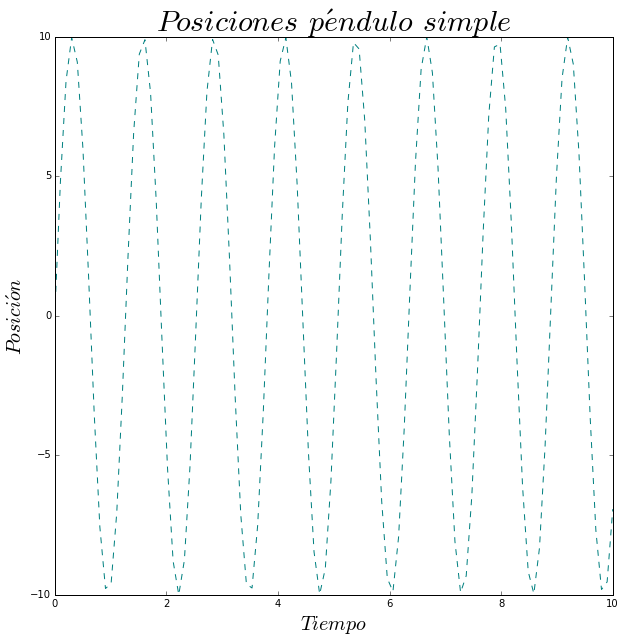

In [3]:
penduloSimple(10,0.5,0,10)

In [4]:
def penduloSimpleAnimable(apertura,frecuencia,desface,duracion):
    A=apertura
    w=frecuencia
    d=desface
    tmax=duracion
    momentos = 1000
    
    instantes = np.linspace(0,tmax,momentos)
    posicion = np.zeros(momentos)
    quieto = np.zeros(momentos)
    
    
    for i in range(momentos):
        posicion[i]=A*np.sin(w*i+d)
        
    for i in range(momentos):
        plt.figure(figsize=(10,10))
        plt.plot(posicion[i],quieto[i],'bo', color='teal')
        plt.title(r"""$Posiciones\,p\'endulo\,simple$""", fontsize=30)
        plt.xlabel(r"""$Posiciones$""", fontsize=20)
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        plt.savefig(str(i))

##Aproximación para péndulo simple por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$

- **Poisición Inicial:**

$$
x = l_{1} sen(\Theta _{1})
$$

$$
y = - l_{1} cos(\Theta _{1}) 
$$

- **Velocidades:**

$$
\frac{\partial x}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial y}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}}
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{1}\left (  l_{1}^{2} \dot{\Theta _{1}}^{2}\right )
$$


- **Energía Potencial:**

$$
U =  - m_{1} g l_{1} cos(\Theta _{1}) 
$$

- **Lagrange:**

$$
L =\frac{1}{2} m_{1}\left (  l_{1}^{2} \dot{\Theta _{1}}^{2} \right ) +  m_{1} g l_{1} cos(\Theta _{1}) 
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) = m_{1} l_{1}^{2} \ddot{\Theta _{1}} 
$$

$$
\left ( \frac{\partial L}{\partial \ r } \right ) = -  m_{1} g l_{1} sen(\Theta _{1})
$$

$$
m_{1} l_{1}^{2} \ddot{\Theta _{1}} + m_{1} g l_{1} sen(\Theta _{1})
$$

###Aplicaciones:

Los sistemas de péndulos son muy útiles en la vida cotidiana, como por ejemplo:

- **Medición del tiempo:** Los muy antiguos relojes de péndulo, que permitieron durante mucho tiempo establecer una medida aproximada del tiempo

- **Plomada:** Intrumento que marca una línea vertical en cualquier superficie, con esta marcación se puede hacer una guia. La plomada es una masa usualmente metálica amarrada a una cuerda.

- **Péndulo de Foucault:** Este péndulo evidencia la rotación de la tierra, pues este péndulo gigante cambia en direccion a la rotación de la tierra, como un péndulo oscila en un plano fijo. Recibe este nombre en honor al físico francés León Foucault. 

#Péndulo Doble:

###Fundamentos Físicos:

El péndulo doble se define como un sistema compuesto por dos péndulos, en donde el péndulo número uno esta colgado del péndulo números dos. 
También es posible apeciarlos como dos péndulos simples pero esta vez uno de los péndulos suspendido de la masa del otro péndulo.

Es posible apreciar visualmente el péndulo doble:
IMAGEN

##Ecuación para péndulo Doble:
###Aproximación para Doble por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$
 
- **Poisición Inicial:**

$$
x_{1} = l_{1} sen(\Theta _{1})
$$

$$
y_{1} = - l_{1} cos(\Theta _{1}) 
$$

$$
x_{2} = l_{1} sen(\Theta _{1}) + l_{2} sen(\Theta _{2})
$$

$$
y_{2} = - l_{1} cos(\Theta _{1}) - l_{2} cos(\Theta _{2}) 
$$


- **Velocidades:**

$$
\frac{\partial x_{1}}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial y_{1}}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial x_{2}}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}} + l_{2} cos(\Theta _{2}) \dot{\Theta _{2}}
$$

$$
\frac{\partial y_{2}}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}} + l_{2} cos(\Theta _{2}) \dot{\Theta _{2}}
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{1} l_{1}^{2} \dot{\Theta _{1}}^{2} + \frac{1}{2} m_{2} l_{1}^{2} \dot{\Theta _{2}}^{2} + m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} cos (\Theta _{1} - \Theta _{2})
$$


- **Energía Potencial:**

$$
U =  - m_{1} g l_{1} cos(\Theta _{1}) + m_{2} g (-l_{1} cos(\Theta _{1}) - l_{2} cos(\Theta _{2}) )
$$

- **Lagrange:**

$$ 
(m_{1} + m_{2}) l_{1}^{2} \ddot{\Theta _{1}} + m_{2} l_{1} l_{2} \ddot{\Theta _{2}} - m_{2} l_{1} l_{2} \dot{\Theta _{2}} sen (\Theta _{1} - \Theta _{2}) (\dot{\Theta _{1}} - \dot{\Theta _{2}}) - m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} sen (\Theta _{1} - \Theta _{2}) - (m_{1} + m_{2}) g l_{1} sen (\Theta _{1})
$$

$$
m_{2} l_{2} \ddot{\Theta _{2}} + m_{2} l_{1} l_{2} \dot{\Theta _{1}} cos (\Theta _{1} - \Theta _{2}) -  m_{2} l_{1} l_{2} \dot{\Theta _{1}} sen (\Theta _{1} - \Theta _{2}) (\dot{\Theta _{1}} - \dot{\Theta _{2}}) -  m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} cos (\Theta _{1} - \Theta _{2}) + l_{2} m_{2} g sen(\Theta _{2})
$$

In [5]:
from scipy.integrate import odeint
from scipy.integrate import ode

In [6]:
m1=1
m2=1
l1=1
l2=1
tet1=np.pi
tet2=0
tmax=100
times=np.linspace(0,tmax,1000)
def function(w,t):
    g=9.8
    delta_a=tet1-tet2
    angulo1=(1/(m1+m2))*(-np.cos(delta_a)*(l2/l1)*(-(l1/l2)*w[1]*np.cos(delta_a)
                                                   +(l1/l2)*w[0]**2*np.sin(delta_a)
                                                   -(g/l2)*np.sin(tet2))+(m2*(l2/l1)*np.sin(delta_a))
                        -(m1+m2)*(g/l1)*np.sin(tet1))
    angulo2=-(l1/l2)*w[1]*np.cos(delta_a)+(l1/l2)*w[0]**2*np.sin(delta_a)-(g/l2)*np.sin(tet2)
    return np.array(angulo1,angulo2)
    

In [7]:
resultado,data=odeint(function,[0.,0.],times,full_output=True,printmessg=True)
print resultado

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
[[  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   1.73664075e-318]
 [  8.22865375e+044   7.56970076e+173]
 ..., 
 [  5.33069524e+242  -1.38951502e+123]
 [ -1.33022207e+224  -1.19166406e-063]
 [ -1.09308524e-222  -4.20386539e-243]]


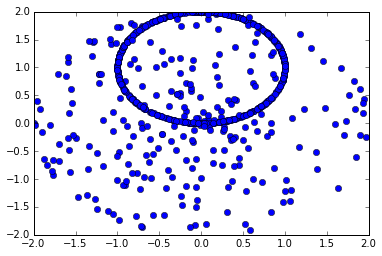

In [8]:

y1=np.cos(resultado[:,0])
x1=np.sin(resultado[:,0])
y2=np.cos(resultado[:,1])
x2=np.sin(resultado[:,1])


for i in range(len(x1)):
    xp=(x1[i]+x2[i])
    yp=(y1[i]+y2[i])
    plt.plot(xp,yp,'bo')
    plt.show


#Sistema de N-Péndulos:

###Fundamentos Físicos:

El péndulo de N masas es la generalización de las masas de los péndulos en el movimiento oscilatorio 

###Solución Método Matemático:

A través de Runge-Kutta y junto con las ecuaciones desacopladas es posible realizar 

##Ecuación para péndulo Doble:
###Aproximación para Doble por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$
 
- **Poisición Inicial:**

$$
x_{n-1} = l_{n-1} sen(\Theta _{n-1})
$$

$$
y_{n-1} = - l_{n-1} cos(\Theta _{n-1}) 
$$

$$
x_{n} = l_{n-1} sen(\Theta _{n-1}) + l_{n} sen(\Theta _{n})
$$

$$
y_{n} = - l_{n-1} cos(\Theta _{n-1}) - l_{n} cos(\Theta _{n}) 
$$

$$
x_{n+1} = l_{n-1} sen(\Theta _{n-1}) + l_{n} sen(\Theta _{n}) + l_{n + 1} sen(\Theta _{n +1})
$$

$$
y_{n+1} = - l_{n-1} cos(\Theta _{n-1}) - l_{n} cos(\Theta _{n}) - l_{n + 1} cos(\Theta _{n + 1})
$$


- **Velocidades:**

$$
\frac{\partial x_{n-1}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}}
$$

$$
\frac{\partial y_{n-1}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}}
$$

$$
\frac{\partial x_{n}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{n} cos(\Theta _{n}) \dot{\Theta _{n}}
$$

$$
\frac{\partial y_{n}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{2} cos(\Theta _{n}) \dot{\Theta _{n}}
$$

$$
\frac{\partial x_{n+1}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{n} cos(\Theta _{n}) \dot{\Theta _{n}} + l_{n+1} cos(\Theta _{n+1}) \dot{\Theta _{n+1}}
$$

$$
\frac{\partial y_{n+1}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{2} cos(\Theta _{n}) \dot{\Theta _{n}} + l_{n+1} sen(\Theta _{n+1}) \dot{\Theta _{n+1}} 
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{n-1}  l_{n-1}^{2} \dot{\Theta _{n-1}}^{_{2}} + \frac{1}{2} m_{n} l_{n-1}^{2} \dot{\Theta _{n-1}}^{_{2}} +  m_{n} l_{n-1} \dot{\Theta _{n-1}} l_{n} \dot{\Theta _{n} }  cos(\Theta _{n-1} - \Theta _{n}) + \frac{1}{2} m_{n} l_{n} \dot{\Theta _{n}}^{2} + frac{1}{2} m_{n+1} l_{n} \dot{\Theta _{n}}^{2} + frac{1}{2} m_{n+1} l_{n+1} \dot{\Theta _{n+1}}^{2} + m_{n+1} l_{n-1} \dot{\Theta _{n-1}} l_{n} \dot{\Theta _{n} }  cos(\Theta _{n-1} - \Theta _{n}) + m_{n+1} l_{n-1} \dot{\Theta _{n-1}} l_{n+1} \dot{\Theta _{n+1} }  cos(\Theta _{n-1} - \Theta _{n+1}) + m_{n +1} l_{n} \dot{\Theta _{n}} l_{n+1} \dot{\Theta _{n+1} }  cos(\Theta _{n} - \Theta _{n+1})  
$$

- **Energía Potencial:**

$$
- l_{n-1}gcos(\Theta _{n-1})( m_{n-1} + m_{n} + m_{n+1} ) - l_{n}gcos(\Theta _{n})( m_{n} + m_{n+1}) - l_{n+1}gcos(\Theta _{n+1})( m_{n+1} )
$$

#Conclusiones:
- El resultado esperado fue el obtenido, tanto para el sistema de péndulo doble, péndulo simple y N-Péndulos

#Bibliografía:

- Ryan, H. L. (2014) *Ordinary Differencial Equations* USA:Springer

- Aslak T, L. F. (2010) *Elements of Scientific COmputing* Vol 7, Springer